In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#로그변환 안된 데이터
df = pd.read_csv('./outlier/2345_customer.csv')
#로그변환 된 데이터
temp = pd.read_csv('./final_data/train.csv')

In [3]:
df.columns

Index(['insd_usermbr_no', 'mno_cd', 'first_prchs_dt', 'last_prchs_dt',
       'sex_clsf_cd', 'age_cd', 'total_prchs_cnt', 'weekend_prchs_cnt',
       'total_payment_amt', 'total_cpt_amt', 'total_prod_amt', 'pref_category',
       'pref_dtl_category', 'pref_tm', 'dly_prchs_amt_max',
       'dly_prchs_amt_min', 'mly_prchs_amt_min', 'mly_prchs_amt_max',
       'mly_prchs_amt_mean', 'wly_prchs_amt_max', 'wly_prchs_amt_min',
       'wly_prchs_amt_mean', 'frequency', 'recency', 'T', 'total_buys',
       'dt_step_min', 'dt_step_max', 'dt_step_mean'],
      dtype='object')

In [4]:
df.drop(['insd_usermbr_no','first_prchs_dt', 'last_prchs_dt','pref_dtl_category','total_buys'],axis = 1 , inplace = True)

In [5]:
df.head(5)

,mno_cd,sex_clsf_cd,age_cd,total_prchs_cnt,weekend_prchs_cnt,total_payment_amt,total_cpt_amt,total_prod_amt,pref_category,pref_tm,...,mly_prchs_amt_mean,wly_prchs_amt_max,wly_prchs_amt_min,wly_prchs_amt_mean,frequency,recency,T,dt_step_min,dt_step_max,dt_step_mean
0,US001201,M,042,10,2,71330,2370,73700,eBook,22 ~ 23,...,35665.000000,55670,15660,35665.000000,1.0,32.0,63.0,32.0,32.0,32.0
1,US001201,F,040,201,105,95,6605,23000,웹소설,04 ~ 05,...,47.500000,95,0,11.875000,36.0,50.0,50.0,1.0,6.0,1.4
2,US001201,F,039,25,17,6100,200,6300,웹툰,08 ~ 09,...,2033.333333,2200,600,1525.000000,3.0,66.0,66.0,14.0,36.0,16.5
3,US001201,M,045,148,13,298140,30260,328400,웹툰,03 ~ 04,...,74535.000000,107135,0,29814.000000,19.0,116.0,118.0,1.0,40.0,5.8
4,US001201,M,052,42,20,132050,10950,143000,만화,23 ~ 24,...,33012.500000,27900,7200,14672.222222,12.0,119.0,120.0,1.0,32.0,9.2


In [6]:
#데이터 처리
df = df[(df['sex_clsf_cd'] != 'Z') & (df['age_cd'] != 'ZZZ')]
df.reset_index(drop = True, inplace = True)
df['age_cd'] = df['age_cd'].apply(lambda x :int(x))
df = pd.concat([df, temp.iloc[:,23:]],axis=1)
df.drop(['mno_cd','pref_category'], axis=1, inplace = True)
df['sex_clsf_cd'] = temp['sex_clsf_cd']
df['bin_count'] = temp['bin_count']
df['pref_tm'] = temp['pref_tm']

In [14]:
df_only_num = df[['total_payment_amt', 'total_cpt_amt', 'total_prod_amt','dly_prchs_amt_max',
       'dly_prchs_amt_min', 'mly_prchs_amt_min', 'mly_prchs_amt_max',
       'mly_prchs_amt_mean', 'wly_prchs_amt_max', 'wly_prchs_amt_min',
       'wly_prchs_amt_mean', 'frequency', 'recency', 'T','dt_step_min', 'dt_step_max', 'dt_step_mean']]

### 박스플롯 확인해보기

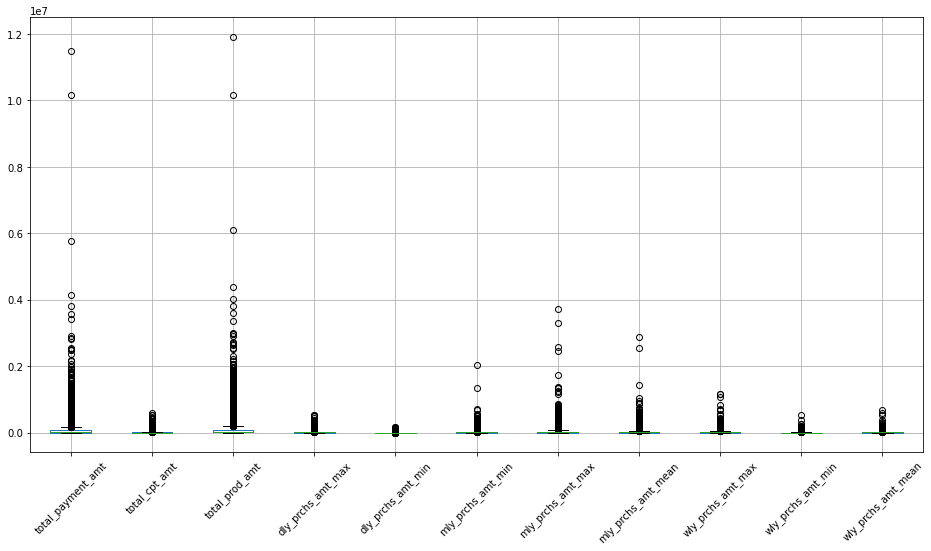

In [15]:
df_only_num.iloc[:,:11].boxplot(figsize=[16,8])
plt.xticks(rotation=45)
plt.show()

In [16]:
out_del  = df_only_num.iloc[:,:11].copy()

### 이상치 제거

In [18]:
# IQR 1.5 이상치 제거
Q1 = out_del.quantile(0.25)
Q3 = out_del.quantile(0.75)
IQR = Q3 - Q1
filter = (out_del >= Q1 - 1.5 * IQR) & (out_del <= Q3 + 1.5 *IQR)
out_del = out_del[filter]

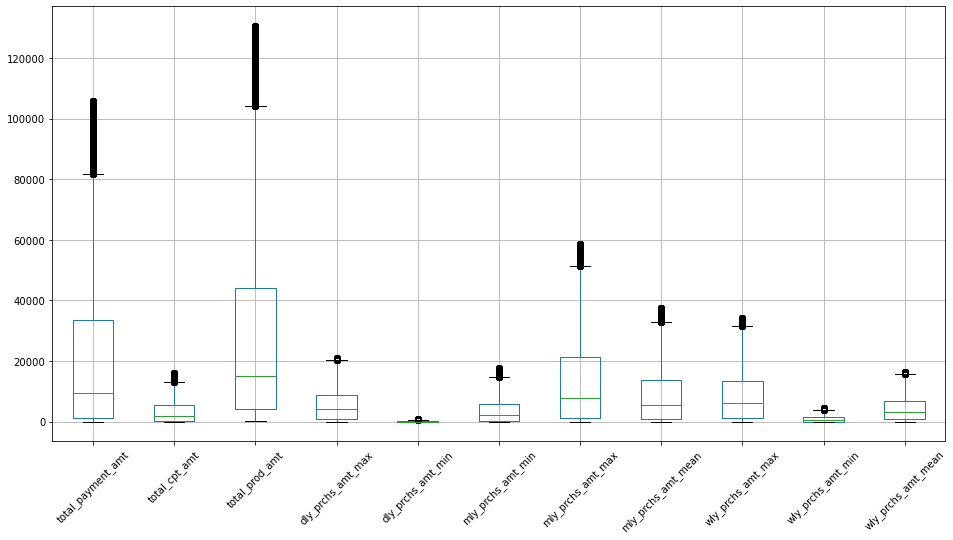

In [19]:
out_del.iloc[:,:11].boxplot(figsize=[16,8])
plt.xticks(rotation=45)
plt.show()

In [20]:
all_test = df_only_num.copy()
all_test = all_test[['total_payment_amt', 'total_cpt_amt', 'total_prod_amt','dly_prchs_amt_max',
       'dly_prchs_amt_min', 'mly_prchs_amt_min', 'mly_prchs_amt_max',
       'mly_prchs_amt_mean', 'wly_prchs_amt_max', 'wly_prchs_amt_min',
       'wly_prchs_amt_mean']]

In [21]:
Q1 =all_test.quantile(0.25)
Q3 =all_test.quantile(0.75)
IQR = Q3 - Q1
filter = (all_test >= Q1 - 1.5 * IQR) & (all_test <= Q3 + 1.5 *IQR)
all_test = all_test[filter]

In [24]:
all_test.head(5)

,total_payment_amt,total_cpt_amt,total_prod_amt,dly_prchs_amt_max,dly_prchs_amt_min,mly_prchs_amt_min,mly_prchs_amt_max,mly_prchs_amt_mean,wly_prchs_amt_max,wly_prchs_amt_min,wly_prchs_amt_mean
0,71330.0,2370.0,73700.0,NaN,NaN,15660.0,55670.0,35665.000000,NaN,NaN,NaN
1,95.0,6605.0,23000.0,95.0,0.0,0.0,95.0,47.500000,95.0,0.0,11.875000
2,6100.0,200.0,6300.0,2200.0,600.0,1800.0,2200.0,2033.333333,2200.0,600.0,1525.000000
3,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,NaN
4,132050.0,10950.0,143000.0,NaN,NaN,21350.0,40500.0,33012.500000,27900.0,NaN,14672.222222


In [23]:
all_test.dropna()

,total_payment_amt,total_cpt_amt,total_prod_amt,dly_prchs_amt_max,dly_prchs_amt_min,mly_prchs_amt_min,mly_prchs_amt_max,mly_prchs_amt_mean,wly_prchs_amt_max,wly_prchs_amt_min,wly_prchs_amt_mean
1,95.0,6605.0,23000.0,95.0,0.0,0.0,95.0,47.500000,95.0,0.0,11.875000
2,6100.0,200.0,6300.0,2200.0,600.0,1800.0,2200.0,2033.333333,2200.0,600.0,1525.000000
10,7000.0,700.0,7700.0,5670.0,1330.0,1330.0,5670.0,3500.000000,5670.0,1330.0,3500.000000
15,13990.0,5310.0,19300.0,13310.0,0.0,0.0,13670.0,3497.500000,13310.0,0.0,1998.571429
16,0.0,9200.0,12900.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
113091,230.0,4670.0,4900.0,230.0,230.0,230.0,230.0,230.000000,230.0,230.0,230.000000
113092,230.0,4670.0,4900.0,230.0,230.0,230.0,230.0,230.000000,230.0,230.0,230.000000
113093,700.0,1300.0,2000.0,700.0,700.0,700.0,700.0,700.000000,700.0,700.0,700.000000
113094,230.0,4670.0,4900.0,230.0,230.0,230.0,230.0,230.000000,230.0,230.0,230.000000


원본 데이터에서 이상치를 없애는 방향으로 하면 데이터 유실이 너무 많다  
1.5도 많고 1도 많이 없어짐

### 로그변환된 데이터의 박스플롯 확인

In [41]:
log_num = temp[['total_payment_amt', 'total_cpt_amt', 'total_prod_amt','dly_prchs_amt_max',
       'dly_prchs_amt_min', 'mly_prchs_amt_min', 'mly_prchs_amt_max',
       'mly_prchs_amt_mean', 'wly_prchs_amt_max', 'wly_prchs_amt_min',
       'wly_prchs_amt_mean', 'frequency', 'recency', 'T','dt_step_min', 'dt_step_max', 'dt_step_mean']]

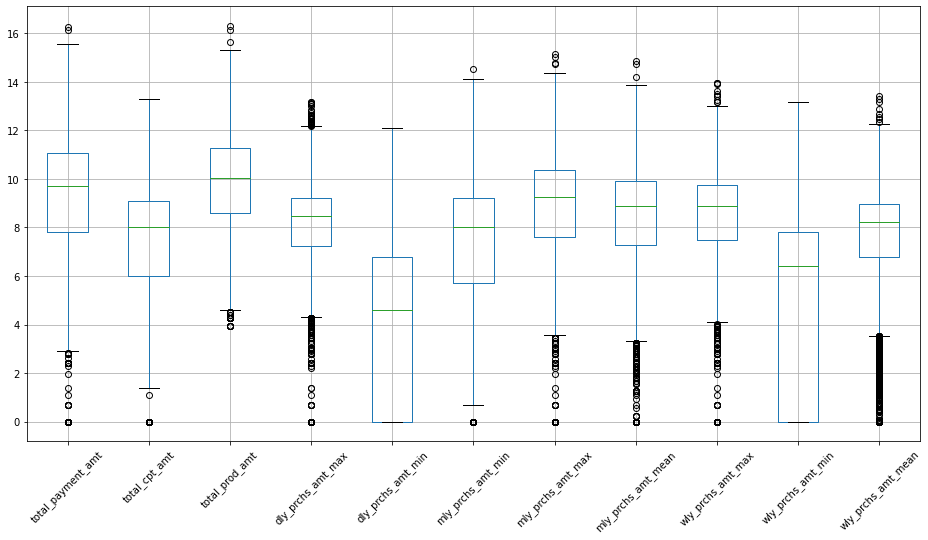

In [42]:
log_num.iloc[:,:11].boxplot(figsize=[16,8])
plt.xticks(rotation=45)
plt.show()

## kdeplot으로 데이터의 분포 확인

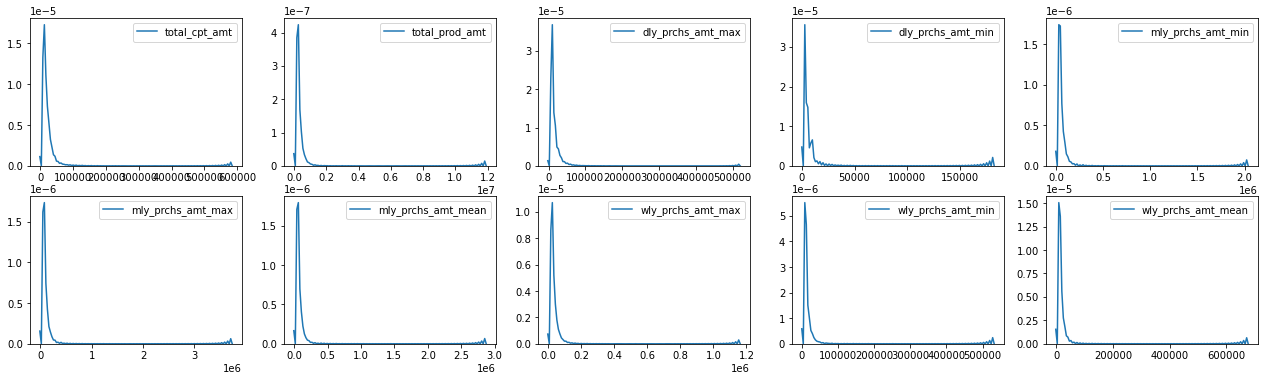

In [60]:
f = plt.figure(figsize = (22,6))
for i in range(10):
    f.add_subplot(2, 5, i+1)
    sns.kdeplot(df_only_num.iloc[:,:11].iloc[:,i+1])
plt.show()

### 로그변환 후 kdeplot

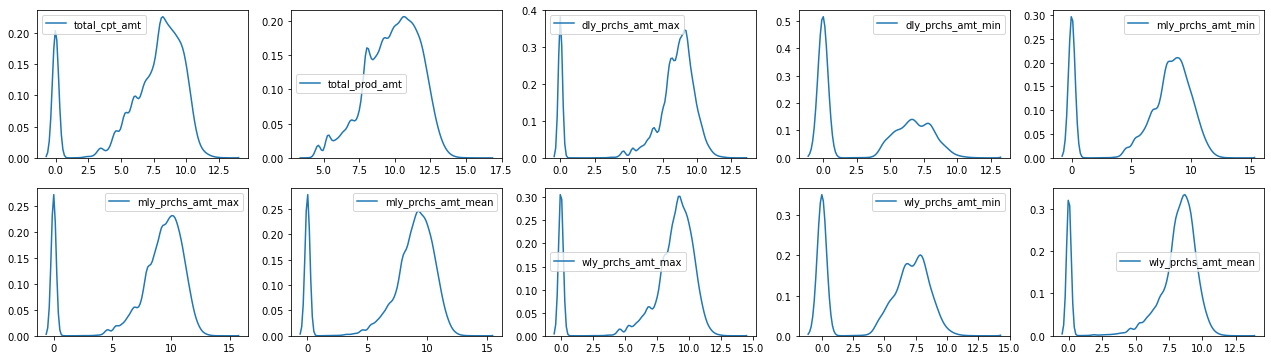

In [61]:
f = plt.figure(figsize = (22,6))
for i in range(10):
    f.add_subplot(2, 5, i+1)
    sns.kdeplot(log_num.iloc[:,i+1])
plt.show()

In [50]:
from scipy.stats import skew

In [62]:
변경전 왜도

8.702211446600526
15.114442748731847
8.439892130976874
13.275540136688958
15.285457100887756
14.45091045613708
16.1946980385757
9.616861189808516
22.567910519472516
12.489138386839295


In [52]:
변경후 왜도

-1.2771577850295184
-0.45485845158221305
-1.567939863618278
0.13917434604272164
-0.9830015980560769
-1.4284958108419792
-1.4165309714666432
-1.5226418791148906
-0.4739785697117489
-1.5013578038491826


In [27]:
per=[6344376218,649055358,5297058,20165026,888290258,2498265285]

In [28]:
name = ['eBook','cartoons','audiobook','webNovel','webtoon','subscribe']

In [29]:
test= pd.Series(per,name)

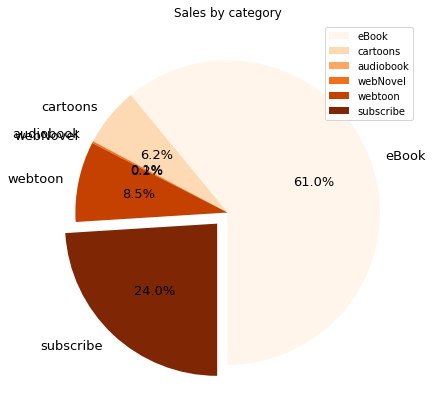

In [30]:
test.plot.pie(autopct='%1.1f%%', figsize = (7,7),title = 'Sales by category',fontsize=13,
              colormap='Oranges',legend=True, startangle=270,explode=[0,0,0,0,0,0.1])
plt.ylabel("")
plt.show()